In [1]:
#Getting the dataset
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 11:06:02--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip’

bike+sharing+datase     [  <=>               ] 273.43K  1004KB/s    in 0.3s    

2024-08-27 11:06:02 (1004 KB/s) - ‘bike+sharing+dataset.zip’ saved [279992]

Archive:  bike+sharing+dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


!unzip bike+sharing+dataset.zip

In [2]:
import pandas as pd
!pip install category_encoders
!pip install mlflow
import mlflow
import mlflow.sklearn  # or mlflow.tensorflow, mlflow.pytorch, etc., depending on your model
from sklearn import set_config
from category_encoders import TargetEncoder


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 545.5/545.5 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.

In [3]:
df = pd.read_csv('hour.csv')

In [4]:
# Description of the dataset: -
# ● season: Season of the year (1:winter, 2:spring, 3:summer, 4:fall).
# ● yr: Year (0: 2011, 1:2012).
# ● mnth: Month of the year (1 to 12).
# ● hr: Hour of the day (0 to 23).
# ● holiday: Whether the day is a holiday.
# ● weekday: Day of the week.
# ● workingday: Whether the day is a working day.
# ● weathersit: Weather situation (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow).
# ● temp: Normalized temperature in Celsius.
# ● hum: Normalized humidity.
# ● windspeed: Normalized wind speed.
# ● cnt: Count of total rental bikes (target variable).

In [5]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
#Data Preprocessing

#creating a new column called day_night in a pandas DataFrame df. This column categorizes each value in the existing hr column as either 'day' or
#'night' based on the hour of the day.

df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

In [10]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_night
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,night
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,night
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,night
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,night
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,night


In [11]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)

In [12]:
#to convert a column in a pandas DataFrame into a datetime format.
df['dteday'] = pd.to_datetime(df.dteday)

In [13]:
df['season'] = df.season.astype('category')

In [14]:
#to convert a column in a pandas DataFrame into a categorical data type.
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')

In [15]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night


In [16]:
df.shape

(17379, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   holiday     17379 non-null  category      
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  category      
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
 14  day_night   17379 non-null  object        
dtypes: category(8), datetime64[ns](1), float64(4), int64(1), object(1)
mem

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

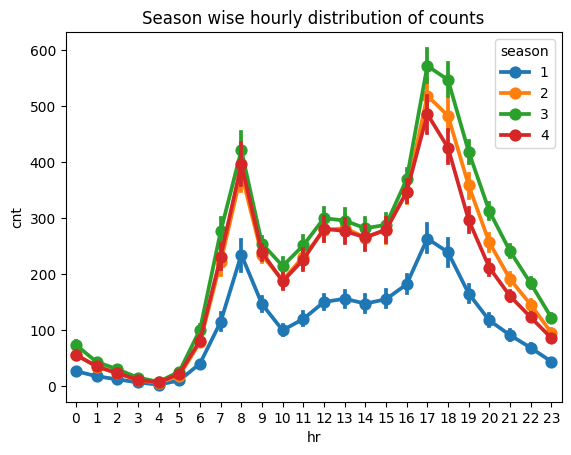

In [19]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['hr','cnt','season']],x='hr',y='cnt',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")
#shows similar trends for all seasons with counts peaking in the morning between 7-9 am and in the evening between 4-6 pm, possibly due to high movement during
# start and end of office hours. The counts are lowest for the spring season, while fall sees highest riders across all 24 hours

In [20]:
df['day_night'].unique()   # Lists all unique dates

array(['night', 'day'], dtype=object)

In [21]:
#this column not needed
df.drop(columns=['dteday'], inplace=True)

In [22]:
#df['day_night'] = df['day_night'].map({'night': 0, 'day': 1})

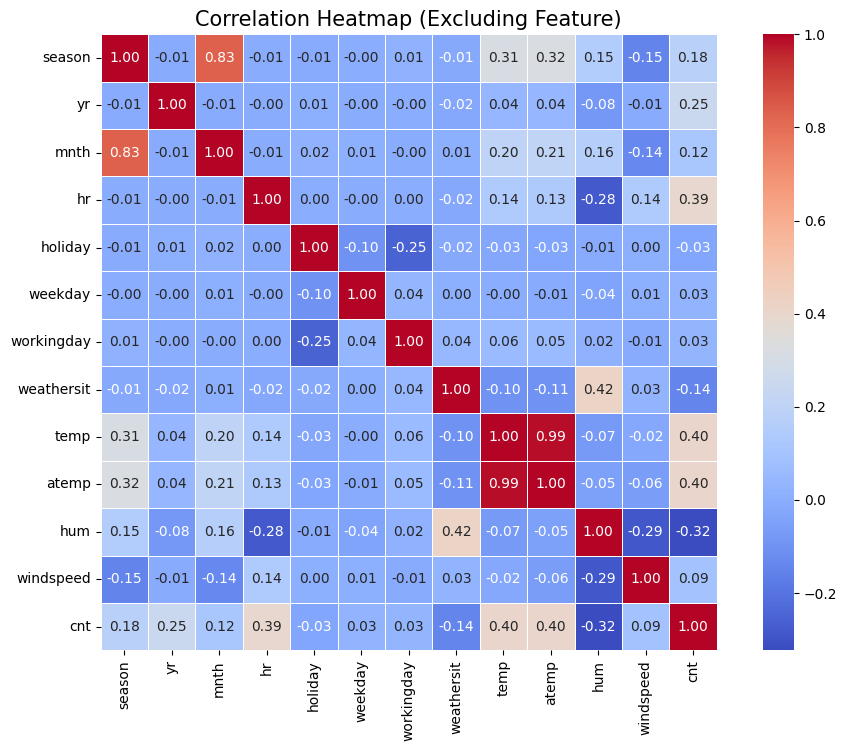

In [23]:
# Specify the feature you want to exclude
feature_to_exclude = 'day_night'

# Calculate the correlation matrix excluding the specified feature
corr_matrix = df.drop(columns=[feature_to_exclude]).corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True)

# Add title to the heatmap
plt.title('Correlation Heatmap (Excluding Feature)', size=15)

# Show the heatmap
plt.show()

In [24]:
# temp_hum(-0.07), temp_windspeed (-0.02), _atemp_hum(-0.05), atemp_windspeed(-0.06)  , hum_windspeed (-0.29)
#weathersit_hum_interaction: Formula: weathersit * hum
# Justification: Weather conditions and humidity both negatively impact bike rentals. This interaction could represent scenarios where bad weather
# coupled with high humidity might have a compounded effect on reducing bike rentals, which might not be fully captured by each feature alone.
# Interaction between Temperature and Humidity
df['temp_hum'] = df['temp'] * df['hum']

# Interaction between Temperature and Hour
df['temp_windspeed'] = df['temp'] * df['windspeed']

# Interaction between Humidity and Wind Speed
#df['hum_windspeed'] = df['hum'] * df['windspeed']

# Display the updated DataFrame to verify new features
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_night,temp_hum,temp_windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,night,0.1944,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,night,0.1760,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,night,0.1760,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,night,0.1800,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,night,0.1800,0.0


In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
!pip install category_encoders
import category_encoders as ce

In [26]:
# # Numerical Features Pipeline
# numerical_features = ['temp', 'hum', 'windspeed', 'temp_hum', 'hum_windspeed', 'temp_windspeed']
# numerical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', MinMaxScaler())
# ])
# X[numerical_features] = numerical_pipeline.fit_transform(X[numerical_features])


# # Categorical features
# categorical_features = ['season', 'weathersit', 'day_night']
# categorical_pipeline = Pipeline([
# ('imputer', SimpleImputer(strategy='most_frequent')),
# ('target_encoder', TargetEncoder())
# ])
# # Transform categorical features
# X_encoded = categorical_pipeline.fit_transform(X[categorical_features], y)

# # Retrieve feature names from the TargetEncoder
# target_encoder = categorical_pipeline.named_steps['target_encoder']
# encoded_feature_names = target_encoder.get_feature_names_out(categorical_features)

# # Combine processed features
# X_encoded = pd.DataFrame(X_encoded, columns=encoded_feature_names)
# X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

In [27]:
from sklearn.compose import ColumnTransformer

In [28]:
# Specify the features to scale
numerical_features = ['temp', 'hum', 'windspeed', 'temp_hum', 'temp_windspeed']
categorical_features = ['season', 'weathersit','day_night']

# # Identify the columns that are not transformed
# remaining_features = [col for col in df.columns if col not in (numerical_features + categorical_features)]

# # Create a pipeline with MinMaxScaler
# numerical_pipeline = Pipeline(steps=[
#     ('scaler', MinMaxScaler())
# ])

# # Apply the pipeline to the selected features
# df[numerical_features] = numerical_pipeline.fit_transform(df[numerical_features])

# df

In [29]:
# from category_encoders import TargetEncoder


# # Create a pipeline for categorical features
# categorical_pipeline = Pipeline(steps=[
#     ('target_encoder', TargetEncoder())
# ])

# # Combine the pipelines using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_pipeline, numerical_features),
#         ('cat', categorical_pipeline, categorical_features)
#     ],
#     remainder='passthrough'  # Keep the remaining columns as they are
# )
# # Apply the preprocessor to the DataFrame
# df_transformed = preprocessor.fit_transform(df, df['cnt'])

# # Convert the result back to a DataFrame if needed
# df_transformed = pd.DataFrame(df_transformed, columns=numerical_features + categorical_features)

# df_transformed.head()

In [30]:
# Create the pipeline and apply transformations
numerical_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('target_encoder', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Apply the preprocessor to the DataFrame
df_transformed = preprocessor.fit_transform(df, df['cnt'])

# Extracting the names of the remaining columns
remaining_features = [col for col in df.columns if col not in (numerical_features + categorical_features)]

# Combine all column names (numerical, categorical, and remaining features)
all_features = numerical_features + categorical_features + remaining_features

# Convert the result back to a DataFrame with the correct columns
df_transformed = pd.DataFrame(df_transformed, columns=all_features)

# Check the result
df_transformed.head()

,temp,hum,windspeed,temp_hum,temp_windspeed,season,weathersit,day_night,yr,mnth,hr,holiday,weekday,workingday,atemp,cnt
0,0.224490,0.81,0.0,0.312039,0.0,111.114569,204.869272,98.894138,0.0,1.0,0.0,0.0,6.0,0.0,0.2879,16.0
1,0.204082,0.80,0.0,0.282504,0.0,111.114569,204.869272,98.894138,0.0,1.0,1.0,0.0,6.0,0.0,0.2727,40.0
2,0.204082,0.80,0.0,0.282504,0.0,111.114569,204.869272,98.894138,0.0,1.0,2.0,0.0,6.0,0.0,0.2727,32.0
3,0.224490,0.75,0.0,0.288925,0.0,111.114569,204.869272,98.894138,0.0,1.0,3.0,0.0,6.0,0.0,0.2879,13.0
4,0.224490,0.75,0.0,0.288925,0.0,111.114569,204.869272,98.894138,0.0,1.0,4.0,0.0,6.0,0.0,0.2879,1.0


In [31]:
# Separating features and target variable
X = df_transformed.drop(columns=['cnt']) # Features
y = df_transformed['cnt'] # Target

In [32]:
df_transformed['day_night'].unique()   # Lists all unique dates

array([ 98.89413845, 265.22593258])

In [33]:
X

,temp,hum,windspeed,temp_hum,temp_windspeed,season,weathersit,day_night,yr,mnth,hr,holiday,weekday,workingday,atemp
0,0.224490,0.81,0.000000,0.312039,0.000000,111.114569,204.869272,98.894138,0.0,1.0,0.0,0.0,6.0,0.0,0.2879
1,0.204082,0.80,0.000000,0.282504,0.000000,111.114569,204.869272,98.894138,0.0,1.0,1.0,0.0,6.0,0.0,0.2727
2,0.204082,0.80,0.000000,0.282504,0.000000,111.114569,204.869272,98.894138,0.0,1.0,2.0,0.0,6.0,0.0,0.2727
3,0.224490,0.75,0.000000,0.288925,0.000000,111.114569,204.869272,98.894138,0.0,1.0,3.0,0.0,6.0,0.0,0.2879
4,0.224490,0.75,0.000000,0.288925,0.000000,111.114569,204.869272,98.894138,0.0,1.0,4.0,0.0,6.0,0.0,0.2879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.244898,0.60,0.193018,0.250401,0.062731,111.114569,175.165493,98.894138,1.0,12.0,19.0,0.0,1.0,1.0,0.2576
17375,0.244898,0.60,0.193018,0.250401,0.062731,111.114569,175.165493,98.894138,1.0,12.0,20.0,0.0,1.0,1.0,0.2576
17376,0.244898,0.60,0.193018,0.250401,0.062731,111.114569,204.869272,98.894138,1.0,12.0,21.0,0.0,1.0,1.0,0.2576
17377,0.244898,0.56,0.157870,0.233708,0.051308,111.114569,204.869272,98.894138,1.0,12.0,22.0,0.0,1.0,1.0,0.2727


In [34]:
#Split the data (20:80 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

    # Make predictions on the test set
y_pred = model.predict(X_test)

    # Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    #mlflow.log_param("alpha", alpha_value)
    #mlflow.log_param("max_iter", max_iter_value)

    #mlflow.log_metric("MSE", mse)
    #mlflow.log_metric("R-squared", r2)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.4f}")

    # Log the model
    #mlflow.sklearn.log_model(model, "linear_regression_model")

Mean Squared Error (MSE): 14974.13
R-squared (R^2): 0.5271


In [36]:
X_train

,temp,hum,windspeed,temp_hum,temp_windspeed,season,weathersit,day_night,yr,mnth,hr,holiday,weekday,workingday,atemp
335,0.183673,0.55,0.263195,0.176565,0.065799,111.114569,204.869272,265.225933,0.0,1.0,11.0,0.0,6.0,0.0,0.1970
7035,0.510204,0.42,0.122840,0.350562,0.079846,198.868856,204.869272,265.225933,0.0,10.0,18.0,0.0,2.0,1.0,0.5000
8051,0.448980,1.00,0.263195,0.738363,0.151337,198.868856,111.579281,98.894138,0.0,12.0,3.0,0.0,3.0,1.0,0.4545
2133,0.448980,0.31,0.000000,0.228892,0.000000,208.344069,175.165493,265.225933,0.0,4.0,18.0,0.0,0.0,0.0,0.4545
8485,0.183673,0.75,0.122840,0.240770,0.030710,111.114569,204.869272,265.225933,0.0,12.0,6.0,0.0,0.0,0.0,0.2273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.448980,0.88,0.105325,0.649759,0.060562,208.344069,204.869272,265.225933,1.0,4.0,9.0,0.0,5.0,1.0,0.4545
11964,0.653061,0.34,0.157870,0.360193,0.130243,208.344069,204.869272,265.225933,1.0,5.0,17.0,0.0,5.0,1.0,0.6212
5390,0.795918,0.43,0.333373,0.552167,0.333373,236.016237,204.869272,265.225933,0.0,8.0,12.0,0.0,3.0,1.0,0.7273
860,0.224490,0.65,0.491243,0.250401,0.147373,111.114569,204.869272,265.225933,0.0,2.0,7.0,0.0,2.0,1.0,0.1970


In [37]:
# Inspect the coefficients
if isinstance(X_train, pd.DataFrame):
    coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])
else:
    coefficients = pd.DataFrame(model.coef_, columns=['Coefficient'])

print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                Coefficient
temp             203.985372
hum               49.893969
windspeed       -125.320253
temp_hum        -178.848063
temp_windspeed   196.302845
season             0.357741
weathersit         0.606984
day_night          0.849666
yr                86.763926
mnth               2.816623
hr                 8.089725
holiday          -21.489925
weekday            2.077808
workingday         4.883164
atemp            118.477657


In [38]:
final_pipeline = Pipeline([
('num_preprocess', numerical_pipeline),
('cat_preprocess', categorical_pipeline),
('model', LinearRegression)
])

In [40]:
# Create the final pipeline with preprocessing and model
final_pipeline = Pipeline([
    ('preprocess', preprocessor),  # Preprocessing step
    ('model', LinearRegression())  # Linear Regression model
])

# Set the configuration to display the pipeline diagram
set_config(display='diagram')

# Display the final pipeline
plt.figure(figsize=(12, 8))  # Adjust the figure size to fit the diagram
final_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['temp', 'hum', 'windspeed',
                                                   'temp_hum',
                                                   'temp_windspeed']),
                                                 ('cat',
                                                  Pipeline(steps=[('target_encoder',
                                                                   TargetEncoder())]),
                                                  ['season', 'weathersit',
                                                   'day_night'])])),
                ('model', LinearRegression())])

<Figure size 1200x800 with 0 Axes>

In [46]:
import numpy as np

# Linear Regression Model from scratch
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # Adding bias term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        # Normal Equation: theta = (X^T X)^-1 X^T y
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)

# X_train, X_test, y_train, y_test are already defined
# Step 4: Train the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model2.predict(X_test)

# Step 6: Calculate MSE and R^2
mse_value = model2.mse(y_test, y_pred)
r2_value = model2.r2_score(y_test, y_pred)


In [47]:

print(f"MSE (scratch): {mse_value}")
print(f"R^2 (scratch): {r2_value}")

MSE (scratch): 14974.133860641217
R^2 (scratch): 0.5271138687719702
